In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import pandas as pd
import datetime
now = datetime.datetime.now

In [2]:
#import dataset
creep_df = pd.read_csv('../Data/Ti_alloys_dataset.csv')
creep_df

,Ti,Al,V,Fe,C,N,H,O,Sn,Nb,...,Cr,Solution treated temp(cel),ST time (h),Anneal temp (cel),Annealing Time (hour),Temperature of creep test (cel),Stress (Mpa),steady state strain rate (1/s),Strain to rupture (%) (Efc),creep_rupture_life
0,87.8750,6.75,4.50,0.40,0.100,0.050,0.1250,0.20,0.00,0.0,...,0.0,690,4.0,1050,0.5,700,319.0,2.090000e-03,15.80,0.01000
1,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,600,319.0,3.240000e-06,0.00,0.01167
2,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,600,250.0,4.400000e-05,0.00,0.03050
3,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,500,520.0,4.430000e-05,0.00,0.04620
4,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,700,319.0,2.130000e-03,0.00,0.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,85.9870,6.20,0.00,0.00,0.021,0.004,0.0080,0.03,1.95,0.0,...,0.0,900,1.0,580,8.0,520,310.0,1.200000e-04,0.00,1160.00000
173,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.0,0,0.0,940,4.0,455,379.0,9.160000e-07,0.00,1619.00000
174,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.0,0,0.0,1030,0.5,455,379.0,1.270000e-06,0.00,1744.00000
175,89.4100,6.00,4.00,0.25,0.080,0.050,0.0100,0.20,0.00,0.0,...,0.0,0,0.0,0,0.0,538,103.0,9.000000e-07,22.30,4681.00000


In [3]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ti                               177 non-null    float64
 1   Al                               177 non-null    float64
 2   V                                177 non-null    float64
 3   Fe                               177 non-null    float64
 4   C                                177 non-null    float64
 5   N                                177 non-null    float64
 6   H                                177 non-null    float64
 7   O                                177 non-null    float64
 8   Sn                               177 non-null    float64
 9   Nb                               177 non-null    float64
 10  Mo                               177 non-null    float64
 11  Zr                               177 non-null    float64
 12  Si                    

In [4]:
features = creep_df.iloc[:, 0:23]
targets = np.log10(creep_df.iloc[:, 23])
features

,Ti,Al,V,Fe,C,N,H,O,Sn,Nb,...,B,Cr,Solution treated temp(cel),ST time (h),Anneal temp (cel),Annealing Time (hour),Temperature of creep test (cel),Stress (Mpa),steady state strain rate (1/s),Strain to rupture (%) (Efc)
0,87.8750,6.75,4.50,0.40,0.100,0.050,0.1250,0.20,0.00,0.0,...,0.00,0.0,690,4.0,1050,0.5,700,319.0,2.090000e-03,15.80
1,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,600,319.0,3.240000e-06,0.00
2,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,600,250.0,4.400000e-05,0.00
3,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,500,520.0,4.430000e-05,0.00
4,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,700,319.0,2.130000e-03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,85.9870,6.20,0.00,0.00,0.021,0.004,0.0080,0.03,1.95,0.0,...,0.00,0.0,900,1.0,580,8.0,520,310.0,1.200000e-04,0.00
173,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.00,0.0,0,0.0,940,4.0,455,379.0,9.160000e-07,0.00
174,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.00,0.0,0,0.0,1030,0.5,455,379.0,1.270000e-06,0.00
175,89.4100,6.00,4.00,0.25,0.080,0.050,0.0100,0.20,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,538,103.0,9.000000e-07,22.30


# Model Training

In [5]:
# rmse loss
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

Run # 1 Fold # 1


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:00:34.473648


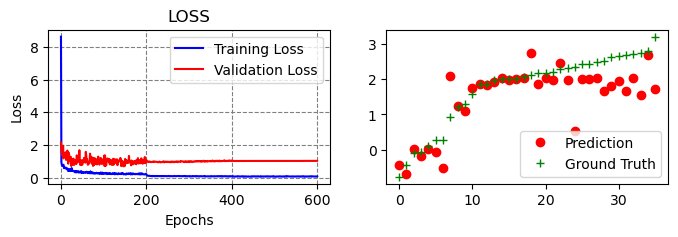

Pearson CC: 0.843480110795108
R2 score: 0.6289888492999391
RMSE: 0.6237614003329376
MAE: 1.0813687815797663
********************
Run # 1 Fold # 2


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:00:37.600287


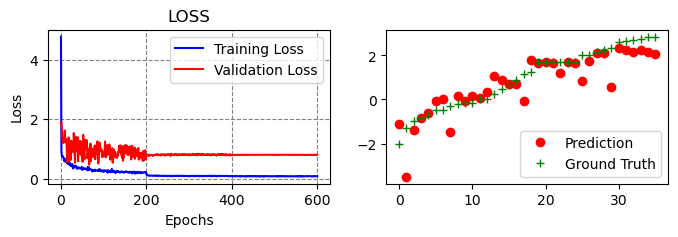

Pearson CC: 0.8768511672434464
R2 score: 0.7343525576310815
RMSE: 0.6945669953096862
MAE: 1.5105098420805088
********************
Run # 1 Fold # 3


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:00:39.134612


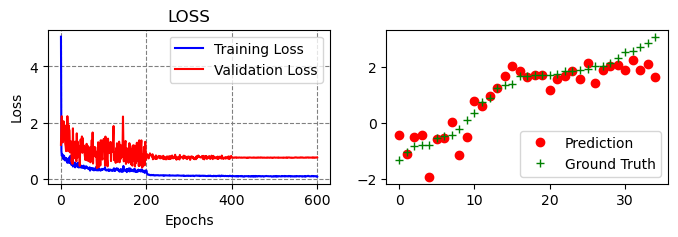

Pearson CC: 0.91985717629334
R2 score: 0.8313308506616399
RMSE: 0.5140296825288615
MAE: 1.332793262866819
********************
Run # 1 Fold # 4


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:00:40.478839


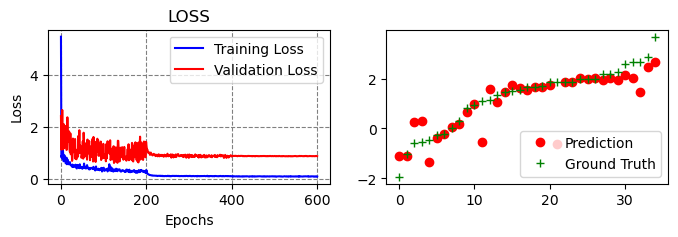

Pearson CC: 0.8580952465834841
R2 score: 0.7052600889281794
RMSE: 0.6660255050892429
MAE: 1.2965955117471726
********************
Run # 1 Fold # 5


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:00:39.055696


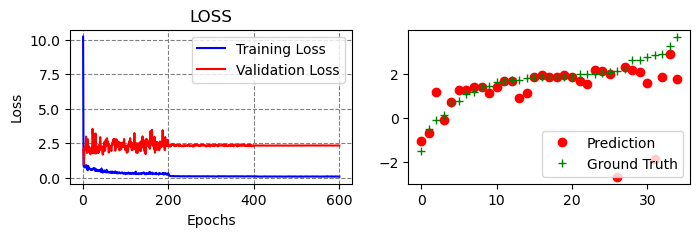

Pearson CC: 0.42157390871129485
R2 score: -0.5225328055502272
RMSE: 1.2585880912156773
MAE: 1.1367562593134226
********************


In [6]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = StandardScaler()
            x_train = scale.fit_transform(x_train)
            x_test = scale.transform(x_test)

            # define DNN
            model = Sequential()
            model.add(Input(shape=(23,)))
            model.add(Dense(1000,activation='relu'))
            model.add(Dense(200,activation='relu'))
            model.add(Dense(40,activation='relu'))
            model.add(Dense(1,activation='linear'))

            model.compile(optimizer= 'RMSprop', loss=root_mean_squared_error)

            # learning rate scheduler
            import math
            INITIAL_LEARNING_RATE = 0.01
            EPOCHS_NUM = 600
            def lr_step_decay(epoch, lr):
                drop_rate = 0.1
                epochs_drop = 200
                return INITIAL_LEARNING_RATE * math.pow(drop_rate, math.floor(epoch/epochs_drop))

            callbacks=[LearningRateScheduler(lr_step_decay, verbose=0)]

            # Fit model
            t = now()
            history = model.fit(x_train, y_train, batch_size=16, epochs=EPOCHS_NUM,
                                validation_split=0.2, verbose=0, callbacks=callbacks)
            print('Training time: %s' % (now() - t))

            # Plot the loss and the predictions
            train_loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochsn = np.arange(1, len(train_loss)+1,1)
            plt.figure(figsize=(8, 2))
            plt.subplot(1,2,1)
            plt.plot(epochsn,train_loss, 'b', label='Training Loss')
            plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
            plt.grid(color='gray', linestyle='--')
            plt.legend()
            plt.title('LOSS')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.subplot(1,2,2)
            y_pred_test = model.predict(x_test, verbose=0)
            plt.plot(y_pred_test, 'ro', label='Prediction')
            plt.plot(np.array(y_test), 'g+', label='Ground Truth')
            plt.legend(loc=4)
            plt.show()

            # Evaluate metrics
            PearsonCC[j, i] = pearsonr(y_test, np.squeeze(y_pred_test))[0]
            R2_score[j, i] = r2_score(y_test, y_pred_test)
            RMSE[j, i] = np.sqrt(mean_squared_error(y_pred_test, y_test))
            MAE[j, i] = np.mean(abs(y_pred_test-np.array(y_test)))

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')

            print(20*'*')

In [7]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.843480,0.628989,0.623761,1.081369
1,0.876851,0.734353,0.694567,1.510510
2,0.919857,0.831331,0.514030,1.332793
3,0.858095,0.705260,0.666026,1.296596
4,0.421574,-0.522533,1.258588,1.136756


In [8]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'RMSE Std': RMSE_std},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,0.783972,0.183008,0.47548,0.503197,0.751394,0.260919,1.271605,0.152196
